### <label style="color:green"> PRACTICA FINAL MINERIA DE DATOS Y APRENDIZAJE MAQUINA </label>

##### Alumnos:
- <label style="color:green"> Alejandro Madrid </label>
- <label style="color:green"> Alejandro Garcia </label>

In [76]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
#
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
#
from keras.applications import AlexNet
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context


ModuleNotFoundError: No module named 'distutils'

In [65]:
# Cargamos los datos
lfw_people = fetch_lfw_people(min_faces_per_person=53, resize=.4)
X = lfw_people.data
y = lfw_people.target
images = lfw_people.images
# Dividimos en entrenamiento-testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.6, random_state=42) # Cambiaremos el randomState posteriormente para comprobar que funciona bien aunque alteremos el split
# Normalizamos los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#
print(images.shape)

(1456, 50, 37)


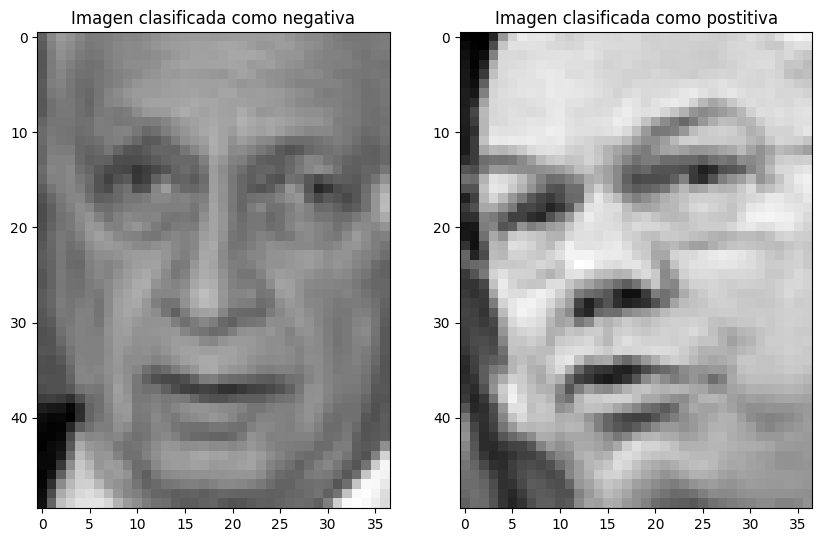

In [67]:
# Vamos a mostrar una imagen de las que usamos como clase positiva y otra de las negativas
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(images[y==0][0], cmap='gray')
plt.title("Imagen clasificada como negativa")
plt.subplot(1,2,2)
plt.imshow(images[y==1][0], cmap='gray')
plt.title("Imagen clasificada como postitiva")
plt.show()

In [68]:
print("- - - - - - - - - - - - - - -")
print("Original Dataset")
print(X)
print(y)
print("- - - - - - - - - - - - - - -")
print(f'X shape --> {X.shape}')
print(f'y shape --> {y.shape}')
print("- - - - - - - - - - - - - - -")

- - - - - - - - - - - - - - -
Original Dataset
[[0.27189544 0.29934642 0.36732027 ... 0.22091503 0.2        0.15424837]
 [0.1124183  0.1503268  0.3019608  ... 0.05098039 0.17385621 0.29934642]
 [0.4366013  0.57908505 0.4797386  ... 0.21960784 0.22745098 0.22745098]
 ...
 [0.36601308 0.27320263 0.2771242  ... 0.17385621 0.18954249 0.19477125]
 [0.19346406 0.24705882 0.34248367 ... 0.7346406  0.6640523  0.6117647 ]
 [0.11633987 0.10196079 0.1267974  ... 0.13333334 0.13725491 0.2535948 ]]
[3 8 2 ... 8 3 5]
- - - - - - - - - - - - - - -
X shape --> (1456, 1850)
y shape --> (1456,)
- - - - - - - - - - - - - - -


In [69]:
print("- - - - - - - - - - - - - - -")
print("Post-scaler Xtrain+test-Dataset")
print(X_train_scaled,'\n')
print(X_test_scaled)
print("- - - - - - - - - - - - - - -")
print("post-scaler ytrain+test-Dataset")
print(y_train)
print(y_test)
print("- - - - - - - - - - - - - - -")
print(f'\nX shape --> {X_train_scaled.shape},{X_test_scaled.shape}')
print(f'y shape --> {y_train.shape},{y_test.shape}')
print("- - - - - - - - - - - - - - -")

- - - - - - - - - - - - - - -
Post-scaler Xtrain+test-Dataset
[[0.14941022 0.17739818 0.262533   ... 0.24835745 0.25721785 0.21699347]
 [0.32503277 0.325887   0.37994727 ... 0.63469124 0.652231   0.67843133]
 [0.4442988  0.39947438 0.5422164  ... 0.10906702 0.11417323 0.12287582]
 ...
 [0.25163826 0.26412615 0.16490766 ... 0.8725362  0.88451445 0.87973857]
 [0.378768   0.39027596 0.4986808  ... 0.11826544 0.11548556 0.10326798]
 [0.35910878 0.3889619  0.3825858  ... 0.12614982 0.06692914 0.07712419]] 

[[0.49934468 0.48751643 0.51055413 ... 0.5308805  0.43307087 0.32418302]
 [0.35910878 0.3390276  0.27572563 ... 0.06701709 0.09973753 0.1124183 ]
 [0.39187416 0.42181343 0.4617415  ... 0.80026287 0.40419948 0.17254902]
 ...
 [0.37483615 0.42706966 0.5052771  ... 0.40604475 0.37270343 0.3764706 ]
 [0.12712975 0.12089357 0.13324541 ... 0.08541393 0.06167979 0.09411765]
 [0.25688073 0.22864653 0.36015835 ... 0.24047308 0.37007874 0.6287582 ]]
- - - - - - - - - - - - - - -
post-scaler ytrain

In [70]:
# Ahora vamos a aplicar los m'etodos de reducci'on de la dimensionalidad
methods = {
    'PCA' :     PCA(n_components=2),
    'MDS' :     MDS(n_components=2),
    'ISOMAP':   Isomap(n_components=2),
    'LLE':      LocallyLinearEmbedding(n_components=2)
}
#
X_train_reduced = {}
X_test_reduced = {}
tiempo_ejecucion = {}
#
for name, method in methods.items():
        start_time = time.time()
        X_train_reduced[name] = method.fit_transform(X_train_scaled)
        X_test_reduced[name] = method.fit_transform(X_test_scaled)
        end_time = time.time()
        tiempo_ejecucion[name] = end_time - start_time
        

In [71]:
def plot_preprocessing(X_data, Y_data, labels, method_name):
    plt.figure(figsize=(10,6))
    plt.scatter(X_data, Y_data, c=labels, cmap='viridis', label=method_name)
    plt.title(f'Reduction with {method_name}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def print_data_preprocessing(X_data, Y_data, method_name):
    print(X_data, '\n', Y_data, f'\nfor method -->{method_name}')
    print(f'X shape --> {X_data.shape}')
    print(f'Y shape --> {Y_data.shape}')

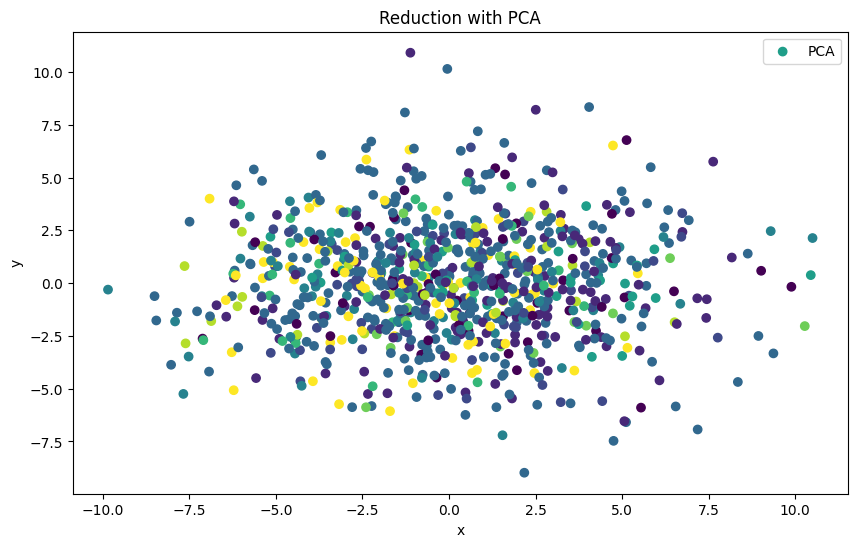

[ 3.16231823e+00  4.31140709e+00 -4.03346109e+00 -1.11574316e+00
 -9.70014334e-01  2.69185710e+00 -1.61273456e+00 -5.40715218e+00
  1.48206341e+00  1.96623015e+00 -2.62037754e+00 -1.81132257e+00
  1.91911861e-01 -2.39857078e+00  4.66110706e+00 -1.96250960e-01
 -1.39429271e+00 -1.10671258e+00 -5.80165267e-01 -7.11946106e+00
 -1.02285957e+00  2.65584040e+00  5.97163582e+00 -1.16172338e+00
  1.56280839e+00 -3.03485513e+00 -2.21493793e+00 -1.57657218e+00
  1.52431285e+00 -6.16416514e-01  5.12961102e+00 -5.73175907e+00
 -6.03152657e+00  6.49995899e+00  1.11229908e+00  6.66376173e-01
  8.22368622e-01  5.56159449e+00  3.28625941e+00 -1.81851065e+00
  1.95147073e+00 -2.71546364e+00 -2.50730085e+00 -1.07173610e+00
 -1.14181900e+00  5.26488495e+00 -6.21053171e+00  4.76912946e-01
  4.74252605e+00  2.82438731e+00  8.17047119e+00  4.39946127e+00
  3.51214838e+00 -1.00507867e+00  3.17140436e+00  2.85285401e+00
 -3.28109741e+00  2.84926510e+00  5.99969566e-01  5.70297480e+00
  2.15573573e+00 -3.56790

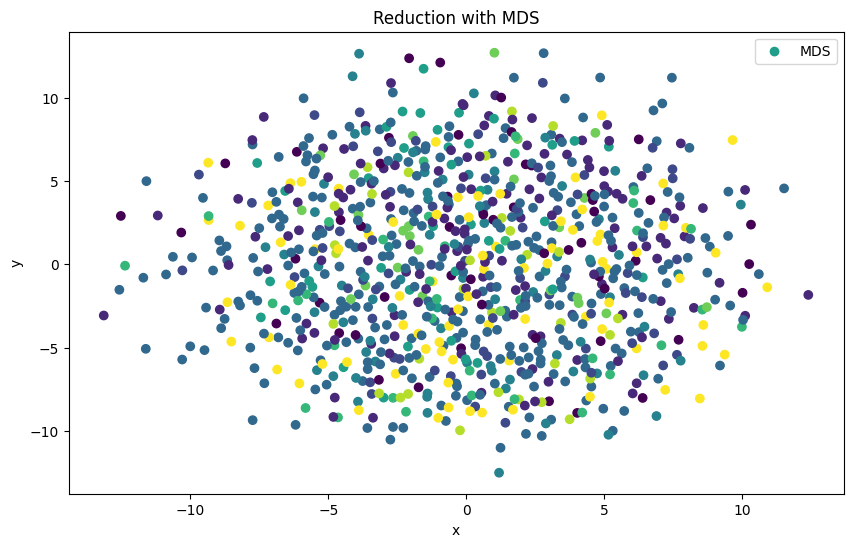

[-3.53933358e+00 -8.55257164e-01 -6.04606084e+00 -1.31320035e+01
 -7.01542326e+00 -2.26821363e+00 -5.94612444e+00  1.43259463e+00
  1.67734826e-01  2.41538772e+00  3.36589572e-01  4.32579758e+00
  5.29391805e+00 -9.48350477e+00 -2.99265858e+00 -7.10635328e+00
 -8.75381530e+00  5.20300780e+00 -4.50999030e+00  4.01503981e+00
 -8.19622066e+00  7.69312044e-01 -2.63259941e-01  1.00061659e+01
  1.28772556e+00 -9.17317516e-01  6.25575061e+00  5.17220253e+00
 -5.48430252e+00 -6.22866323e+00 -8.73056703e+00 -7.40325380e-01
 -4.64749743e+00 -2.81366508e-01 -6.32020523e-01  6.39832172e+00
 -7.78234201e-01  3.56847510e+00 -9.68540682e+00  5.65477269e+00
  1.96544711e+00 -2.28595982e+00  4.51949296e+00  8.84840586e-01
  9.17178757e+00 -1.81002696e+00  5.47488870e-01 -8.80214117e-01
 -2.25642941e+00 -9.53841751e+00 -2.72757988e+00 -1.50695615e+00
  6.55451969e+00  1.10107560e+00 -1.54602732e+00  4.99627789e+00
 -1.89612245e-01  4.19685691e+00  1.03104073e+01 -1.49002454e+00
 -7.76637100e+00  6.36324

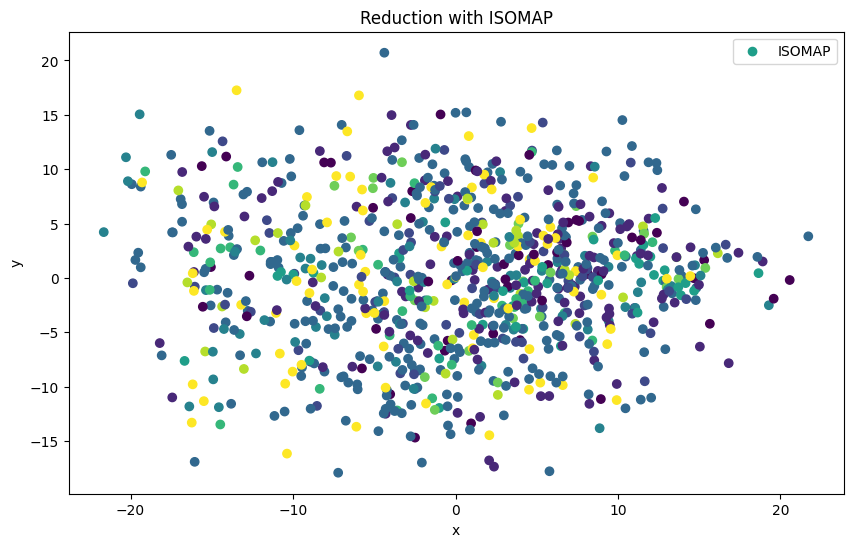

[ 6.48554039e+00  1.12214003e+01 -1.61766777e+01  2.06956983e+00
 -1.43320954e+00  5.30254507e+00 -6.08892536e+00 -1.53605852e+01
  3.52349019e+00  6.25889301e+00 -7.81471157e+00 -6.48254013e+00
  6.50196934e+00 -1.11445646e+01  1.34904642e+01 -9.98057127e-01
 -2.91992640e+00 -1.31199265e+00 -3.66466928e+00 -1.56180048e+01
 -3.09527445e+00  5.26054907e+00  1.27847500e+01 -5.07291126e+00
  3.86015654e+00 -8.04581165e+00 -1.32455778e+00 -5.75146580e+00
  3.38087296e+00 -2.22848940e+00  8.94709396e+00 -1.46694078e+01
 -1.44776688e+01  1.46712227e+01  4.25724459e+00  4.70750237e+00
  2.86651659e+00  1.47917776e+01  1.10155630e+01 -1.88497567e+00
  5.01737595e+00 -1.08117046e+01 -6.70154715e+00 -4.39559126e+00
 -4.19886398e+00  1.39121857e+01 -1.59518719e+01  1.27383983e+00
  1.19959831e+01  5.83908558e+00  1.89061222e+01  1.04551668e+01
  7.44026423e+00 -3.38942313e+00  9.81745338e+00  9.46675110e+00
 -1.26839590e+01  6.34690905e+00 -2.41668925e-01  9.43243980e+00
  7.64167976e+00 -8.34953

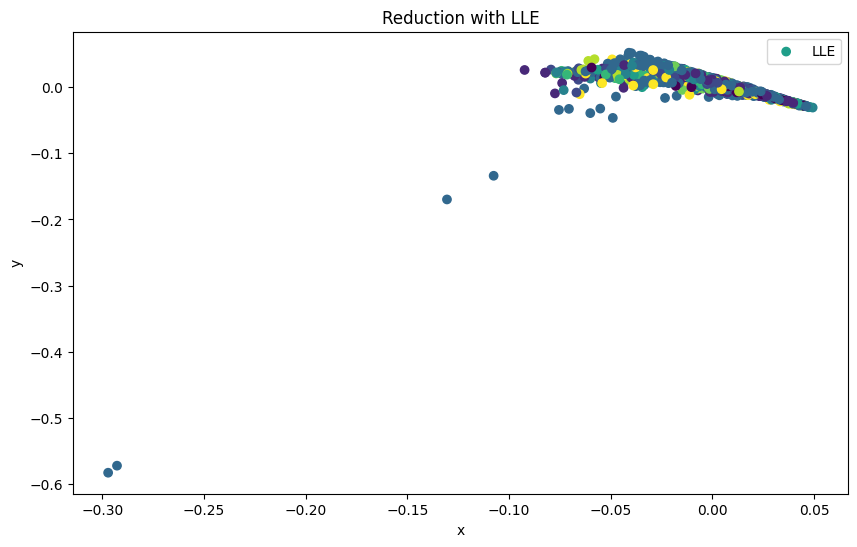

[ 1.73773527e-02  4.92982571e-02 -3.92740403e-02 -2.95621632e-03
 -1.24428654e-02  2.03983718e-02 -7.15368812e-03 -4.14401748e-02
  1.84712091e-02  2.51803517e-02 -2.48121409e-02 -4.95668456e-03
  2.35026694e-02 -2.39557846e-02  3.71375793e-02 -1.06222233e-03
 -8.21731677e-03  1.05915966e-02 -1.65835937e-02 -7.19343345e-02
 -1.62540283e-02  1.86323933e-02  4.16311733e-02 -1.47433942e-02
  3.75188046e-02 -2.32821147e-02 -6.48885178e-03 -7.19379458e-03
 -8.80788946e-04 -1.01137507e-02  8.58966246e-03 -4.75966888e-02
 -4.44610542e-02  4.34196055e-02  1.38936279e-02  2.30901149e-02
  1.36497893e-02  3.73913086e-02  1.93603464e-02  3.59892200e-03
  3.27103455e-02 -3.99211729e-02  4.73705248e-03 -1.48671312e-02
  6.91915228e-03  3.49254338e-02 -9.23522341e-02  2.04148484e-03
  3.40047959e-02 -3.83949862e-03  3.61717763e-02  3.85650770e-02
  2.51354091e-02 -1.52059446e-02  2.88169340e-02  3.42832553e-02
 -4.31460127e-02  2.63330664e-02  6.05658520e-03  4.41579328e-02
  1.56425083e-02  2.91569

In [72]:
# Ahora graficamos los m'etodos de reducci'on 
for name, X_train_data in X_train_reduced.items():
    plot_preprocessing(X_train_data[:,0], X_train_data[:,1], y_train, name)
    print_data_preprocessing(X_train_data[:,0], X_train_data[:,1], name)

### Aplicación de modelos

#### AlexNet

In [ ]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
model.eval()